In [39]:
!pip install keras

     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     -------- ------------------------------- 10.2/48.7 kB ? eta -:--:--
     --------------- ---------------------- 20.5/48.7 kB 131.3 kB/s eta 0:00:01
     --------------- ---------------------- 20.5/48.7 kB 131.3 kB/s eta 0:00:01
     --------------- ---------------------- 20.5/48.7 kB 131.3 kB/s eta 0:00:01
     --------------- ---------------------- 20.5/48.7 kB 131.3 kB/s eta 0:00:01
     ------------------------ -------------- 30.7/48.7 kB 81.9 kB/s eta 0:00:01
     -------------------------------------- 48.7/48.7 kB 136.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.2 MB ? eta -:--:--
   --- ------------------------------------ 0.1/1.2 MB 1.3 MB/s eta 0:00:01
   -------- ------------------------------- 0.2/1.2 MB 1.9 MB/s eta 0:00:01
   --------------- ------------------------ 0.5/1.2 MB 2.8 MB/s eta 0:00:01
   ------

In [43]:
!pip install tensorflow

   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/390.3 MB 403.5 kB/s eta 0:16:07
   ---------------------------------------- 0.1/390.3 MB 403.5 kB/s eta 0:16:07
   ---------------------------------------- 0.2/390.3 MB 482.7 kB/s eta 0:13:29
   ---------------------------------------- 0.2/390.3 MB 482.7 kB/s eta 0:13:29
   ---------------------------------------- 0.2/390.3 MB 482.7 kB/s eta 0:13:29
   ---------------------------------------- 0.2/390.3 MB 482.7 kB/s eta 0:13:29
   ---------------------------------------- 0.3/390.3 MB 545.8 kB/s eta 0:11:55
   ---------------------------------------- 0.3/390.3 MB 545.8 kB/s eta 0:11:55
   --

In [1]:
#libreria para las funciones de sistema operativo (como abrir archivos)
import os

In [3]:
#funcion para contar los archivos
def contarArchivos(folder_path):
    numArchivos = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return numArchivos

In [5]:
#Direcciones de los archivos
entrenarSaludable = "datasetMango/train/healthy"
entrenarAlternaria = "datasetMango/train/alternaria"
entrenarAntracnosis = "datasetMango/train/anthracnose"
entrenarAspergillus = "datasetMango/train/aspergillus"

probarSaludable = "datasetMango/test/healthy"
probarAlternaria = "datasetMango/test/alternaria"
probarAntracnosis = "datasetMango/test/anthracnose"
probarAspergillus = "datasetMango/test/aspergillus"

validarSaludable = "datasetMango/valid/healthy"
validarAlternaria = "datasetMango/valid/alternaria"
validarAntracnosis = "datasetMango/valid/anthracnose"
validarAspergillus = "datasetMango/valid/aspergillus"

In [7]:
print("Número de imágenes de mangos saludables en el set de entrenamiento: ", contarArchivos(entrenarSaludable))
print("Número de imágenes de mangos con alternaria en el set de entrenamiento: ", contarArchivos(entrenarAlternaria))
print("Número de imágenes de mangos con antracnosis en el set de entrenamiento: ", contarArchivos(entrenarAntracnosis))
print("Número de imágenes de mangos con aspergillus en el set de entrenamiento: ", contarArchivos(entrenarAspergillus))
print("=============================================================================")
print("Número de imágenes de mangos saludables en el set de prueba: ", contarArchivos(probarSaludable))
print("Número de imágenes de mangos con alternaria en el set de prueba: ", contarArchivos(probarAlternaria))
print("Número de imágenes de mangos con antracnosis en el set de prueba: ", contarArchivos(probarAntracnosis))
print("Número de imágenes de mangos con aspergillus en el set de prueba: ", contarArchivos(probarAspergillus))
print("=============================================================================")
print("Número de imágenes de mangos saludables en el set de validación: ", contarArchivos(validarSaludable))
print("Número de imágenes de mangos con alternaria en el set de validación: ", contarArchivos(validarAlternaria))
print("Número de imágenes de mangos con antracnosis en el set de validación: ", contarArchivos(validarAntracnosis))
print("Número de imágenes de mangos con aspergillus en el set de validación: ", contarArchivos(validarAspergillus))

Número de imágenes de mangos saludables en el set de entrenamiento:  406
Número de imágenes de mangos con alternaria en el set de entrenamiento:  415
Número de imágenes de mangos con antracnosis en el set de entrenamiento:  277
Número de imágenes de mangos con aspergillus en el set de entrenamiento:  328
Número de imágenes de mangos saludables en el set de prueba:  18
Número de imágenes de mangos con alternaria en el set de prueba:  21
Número de imágenes de mangos con antracnosis en el set de prueba:  12
Número de imágenes de mangos con aspergillus en el set de prueba:  20
Número de imágenes de mangos saludables en el set de validación:  45
Número de imágenes de mangos con alternaria en el set de validación:  37
Número de imágenes de mangos con antracnosis en el set de validación:  32
Número de imágenes de mangos con aspergillus en el set de validación:  29


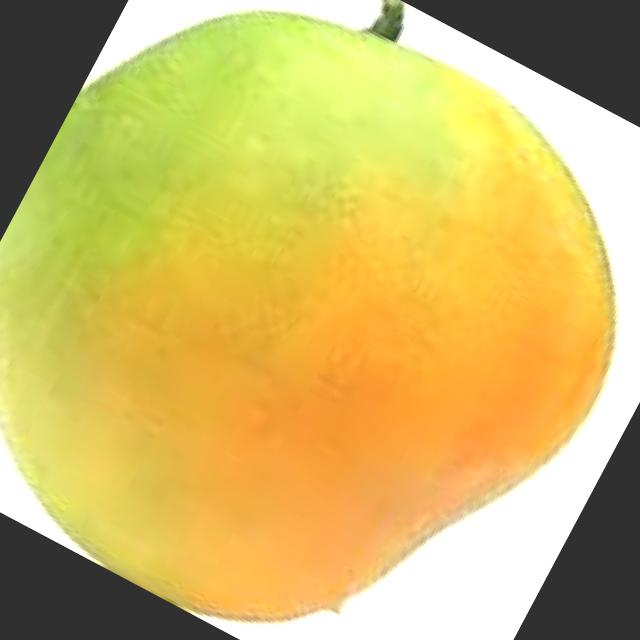

In [9]:
#Ver una de las imagenes mediante la libreria PIL
from PIL import Image
import IPython.display as display

path_image = 'datasetMango/train/healthy/healthy_015_jpg.rf.9436a1cc19f824c7b77d476f437ecc7b.jpg'

with open(path_image, 'rb') as f:
    display.display(display.Image(data=f.read(),width=500))

In [11]:
#Extraer la funcion para el preprocesamiento de tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Generar variables para el preprocesamiento de imagenes
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
#flow se usa para cargar imagenes en una estructura de datos tras ser preprocesadas y aumentadas para
#su correcto uso en el entrenamiento y validacion del modelo
train_generator = train_datagen.flow_from_directory('datasetMango/train',#localizacion
                                                    target_size=(225,225),#tamaño objetivo de la imagen
                                                    batch_size=32,#n. imagenes que son regresadas en cada lote
                                                    class_mode='categorical')#modo de etiquetado
validation_generator = test_datagen.flow_from_directory('datasetMango/valid',
                                                        target_size=(225,225),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 1422 images belonging to 4 classes.
Found 139 images belonging to 4 classes.


In [15]:
#La forma secuencial de keras pasa los datos de una capa CNN a otra.
from keras.models import Sequential
#operacion convolucional, reduccion del size del input, arreglo unidimensional, capa final de clasificacion
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [21]:
#Declarar el nuevo modelo
modelo = Sequential()
#Crear nueva capa (extraccion de rasgos,input size,modo no lineal)
modelo.add(Conv2D(32, (3, 3), input_shape=(225, 225, 3), activation='relu'))
#Crear una capa que reduzca las dimensiones del feature map para reducir la complejidad del sistema
modelo.add(MaxPooling2D(pool_size=(2, 2)))
#Crear una capa que realiza operaciones convolucionales e introduce no-linealidad
modelo.add(Conv2D(64, (3, 3), activation='relu'))
#Capa que reduce la complejidad de las feature maps
modelo.add(MaxPooling2D(pool_size=(2, 2)))
#Capa que convierte tensors (imagen 2D con vectores) en un arreglo unidimensional
modelo.add(Flatten())
#Agrega una capa Dense no lineal
modelo.add(Dense(64, activation='relu'))
#Agrega otra capa Dense para la clasificacion (4 clases)
modelo.add(Dense(4, activation='softmax'))

In [23]:
#Compilacion del modelo especificando algoritmo de optimizacion, funcion de perdida y
#metrica de evaluacion durante el entrenamiento
modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
#Entrenar el modelo
history = modelo.fit(train_generator,
                     batch_size=16,
                     epochs=5,
                     validation_data=validation_generator,
                     validation_batch_size=16)

C:\Users\proye\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4231 - loss: 2.3468

C:\Users\proye\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


45/45 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.4247 - loss: 2.3262 - val_accuracy: 0.5540 - val_loss: 0.9180
Epoch 2/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.6522 - loss: 0.7912 - val_accuracy: 0.6403 - val_loss: 0.7307
Epoch 3/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.6757 - loss: 0.7412 - val_accuracy: 0.6547 - val_loss: 0.7375
Epoch 4/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.6756 - loss: 0.6988 - val_accuracy: 0.6978 - val_loss: 0.6645
Epoch 5/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.7015 - loss: 0.6940 - val_accuracy: 0.6835 - val_loss: 0.6811


In [31]:
history_additional = modelo.fit(train_generator,
                                epochs=10,
                                batch_size=16,
                                validation_data=validation_generator,
                                initial_epoch=5)

Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.7227 - loss: 0.5959 - val_accuracy: 0.7338 - val_loss: 0.6542
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.7272 - loss: 0.6202 - val_accuracy: 0.7482 - val_loss: 0.6730
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.7599 - loss: 0.5513 - val_accuracy: 0.7338 - val_loss: 0.6295
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.7563 - loss: 0.5633 - val_accuracy: 0.7770 - val_loss: 0.6089
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.7949 - loss: 0.5030 - val_accuracy: 0.7482 - val_loss: 0.6390


In [33]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

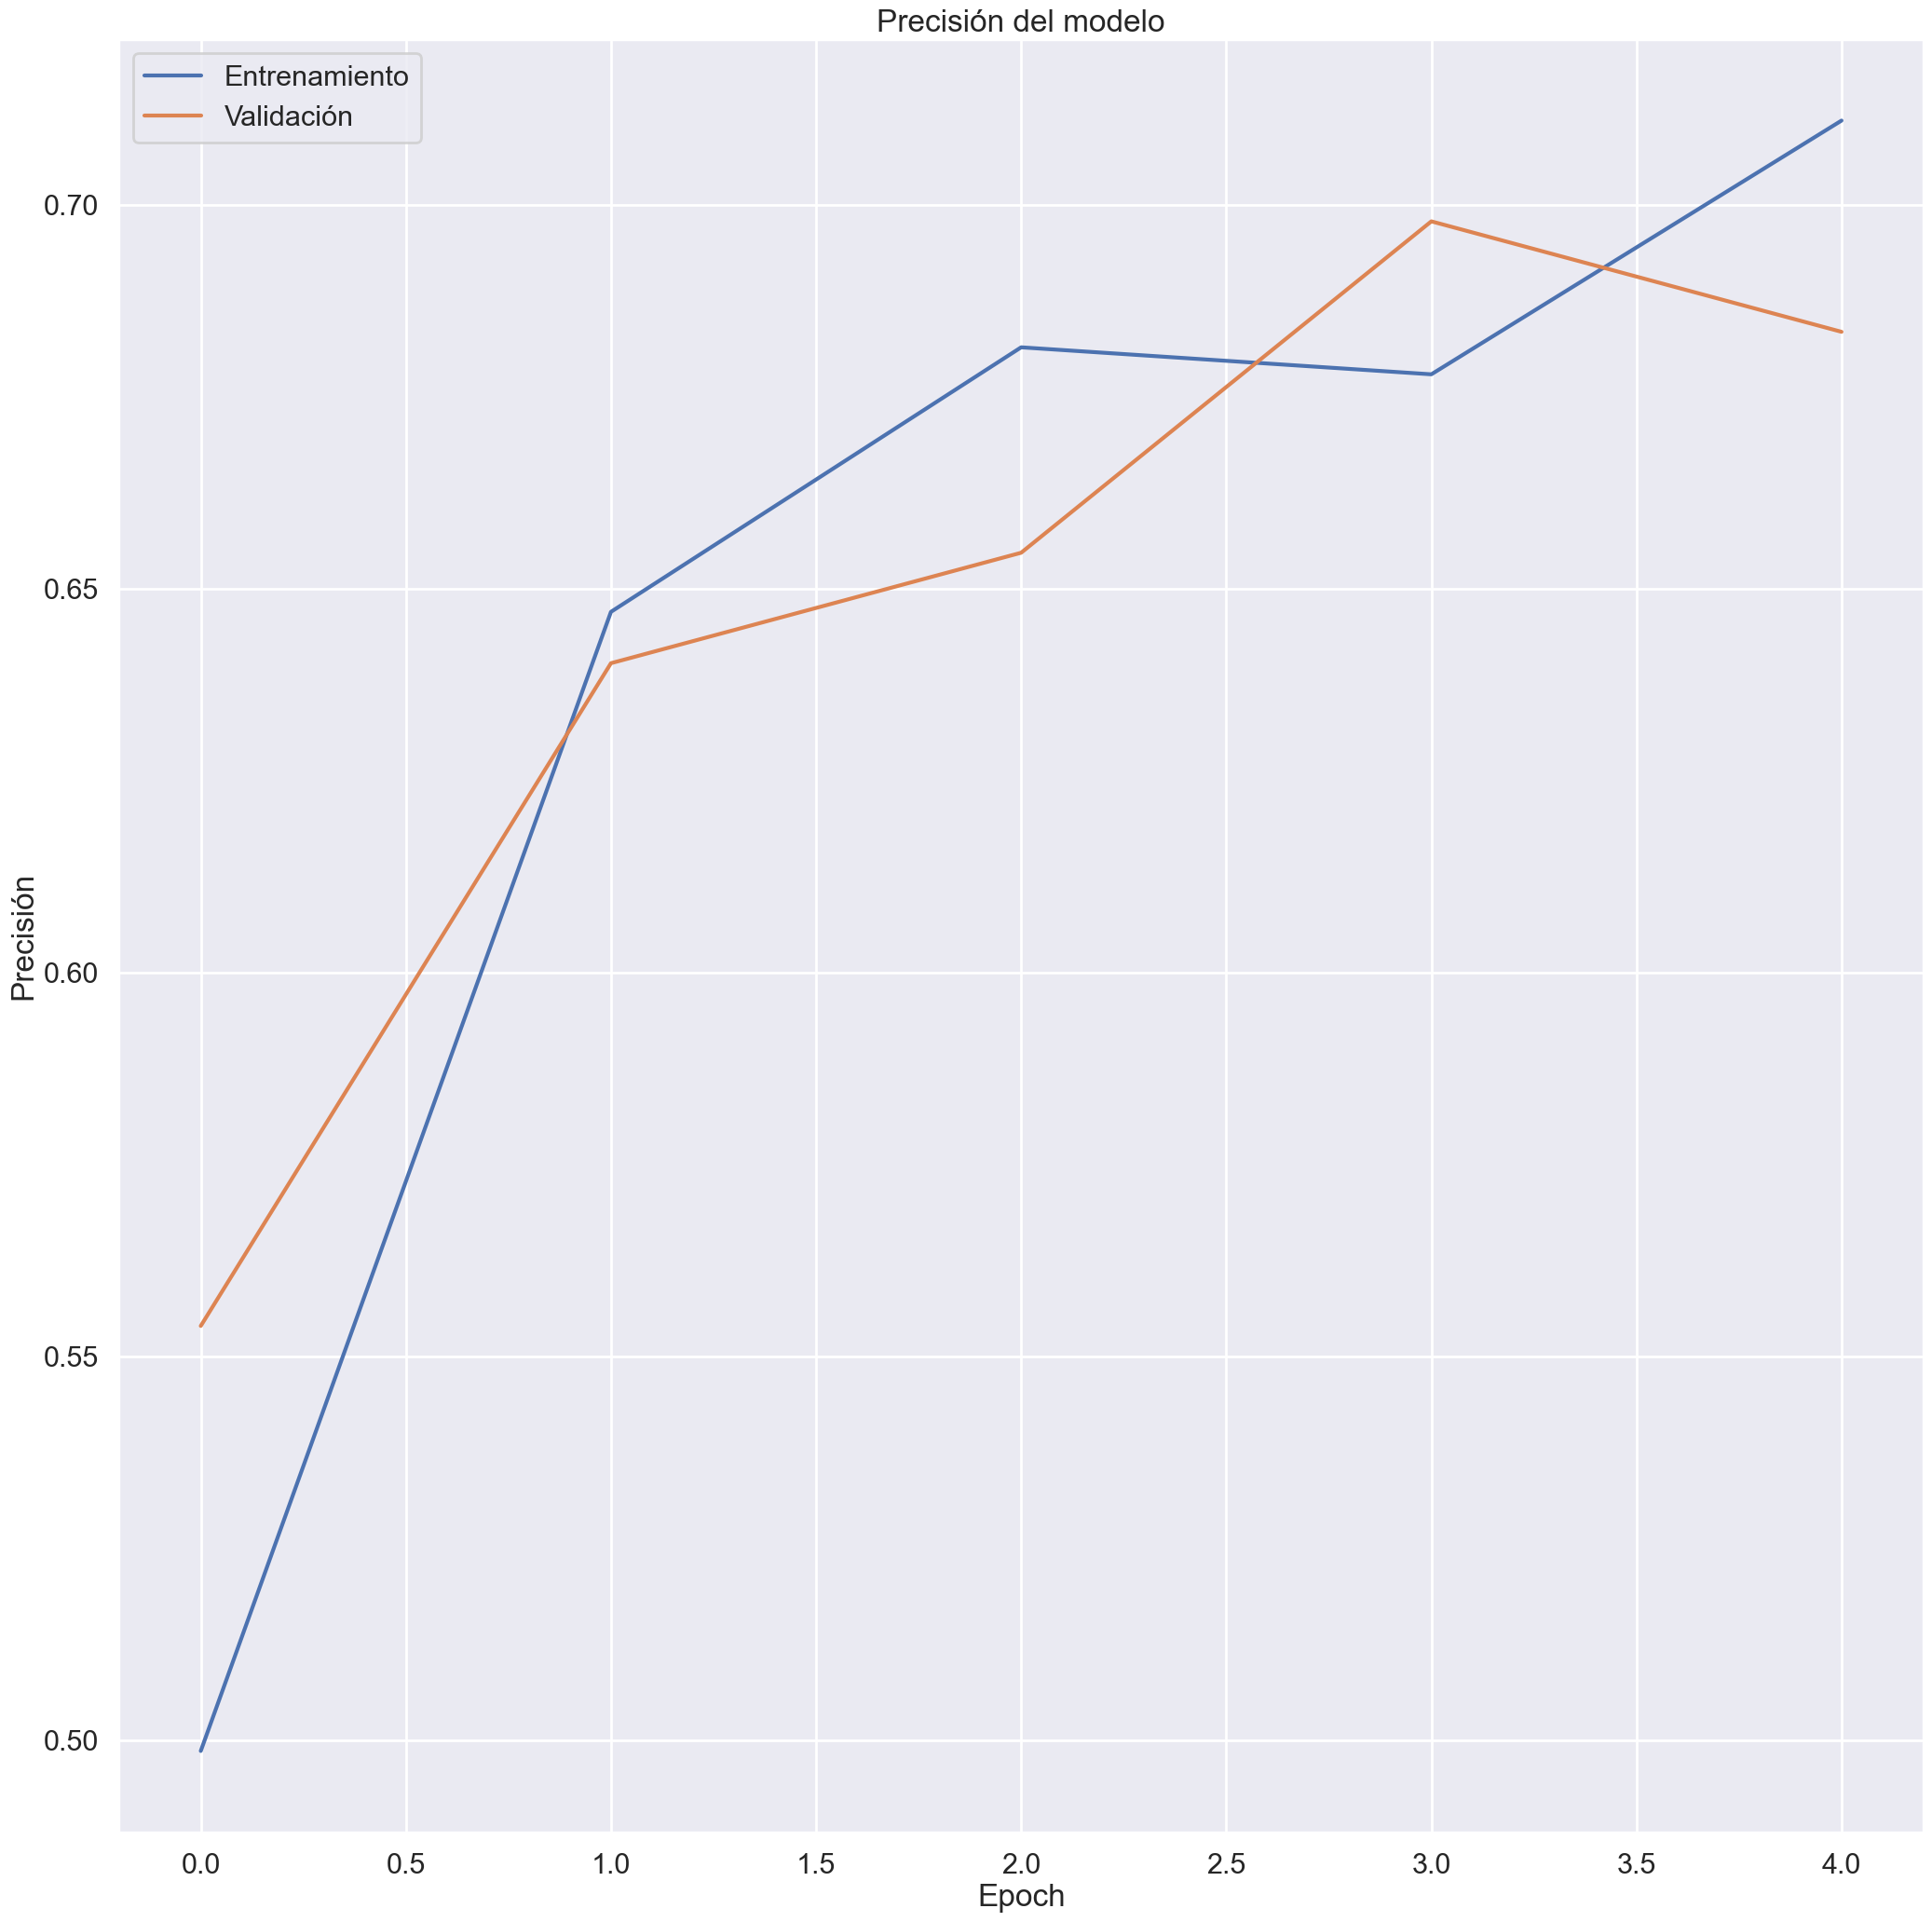

In [37]:
#Graficar mediante seaborn
sns.set_theme()
sns.set_context("poster")
figure(figsize=(25, 25), dpi=100)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Epoch')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

In [43]:
#Guardar el modelo
modelo.save("model.keras")

In [63]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

x = preprocess_image('datasetMango/test/healthy/healthy_007_jpg.rf.733cfae637bf3a2a37b5babaa2f64bc3.jpg')

In [65]:
predictions = modelo.predict(x)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


array([4.1655308e-06, 7.4033996e-05, 7.7108524e-07, 9.9992108e-01],
      dtype=float32)

In [67]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
labels

{0: 'alternaria', 1: 'anthracnose', 2: 'aspergillus', 3: 'healthy'}

In [69]:
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

healthy
